<a href="https://colab.research.google.com/github/joyinning/python_practice_business_analysis/blob/main/Website_Traffic_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://platform.stratascratch.com/data-projects/website-traffic-analysis

**Goals**
1. to understand the traffic better, in particular the volume and distribution of events
2. to develop ideas how to increase the links' clickrates.

**Data Description** <br>
The data set provided (`traffic.csv`) contains web traffic data (`events`) from a few different pages (`links`) over a period of 7 days including vairous categorical dimensions about the geographic origin of that traffic as well as a page's content `isrc`.

In [ ]:
import pandas as pd
df = pd.read_csv("/content/traffic.csv")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226278 entries, 0 to 226277
Data columns (total 9 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   event    226278 non-null  object
 1   date     226278 non-null  object
 2   country  226267 non-null  object
 3   city     226267 non-null  object
 4   artist   226241 non-null  object
 5   album    226273 non-null  object
 6   track    226273 non-null  object
 7   isrc     219157 non-null  object
 8   linkid   226278 non-null  object
dtypes: object(9)
memory usage: 15.5+ MB


In [ ]:
df.head()

,event,date,country,city,artist,album,track,isrc,linkid
0,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
1,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
2,click,2021-08-21,India,Ludhiana,Reyanna Maria,So Pretty,So Pretty,USUM72100871,23199824-9cf5-4b98-942a-34965c3b0cc2
3,click,2021-08-21,France,Unknown,"Simone & Simaria, Sebastian Yatra",No Llores Más,No Llores Más,BRUM72003904,35573248-4e49-47c7-af80-08a960fa74cd
4,click,2021-08-21,Maldives,Malé,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8


**Question 1** <br>
How many total pageview events did the links in the provided dataset receive in the full period, how many per day?

In [ ]:
# total pageview events
df[df["event"]=="pageview"].shape[0]

142015

In [ ]:
# daily pageview events
df_daily = df[df["event"]=="pageview"].groupby('date').size().reset_index(name = "counts")
df_daily

,date,counts
0,2021-08-19,22366
1,2021-08-20,21382
2,2021-08-21,21349
3,2021-08-22,20430
4,2021-08-23,18646
5,2021-08-24,18693
6,2021-08-25,19149


In [ ]:
round(df_daily['counts'].mean(), 0)

20288.0

***If the same user views the same page multiple times, it will be counted each time.***

In [ ]:
df2 = df.drop_duplicates()
df2["event"].value_counts()

pageview    73360
click       32499
preview     16708
Name: event, dtype: int64

In [ ]:
df2[df2["event"]=="pageview"].shape[0]

73360

In [ ]:
df2[df2["event"]=="pageview"].groupby("date")["event"].count()

date
2021-08-19    13006
2021-08-20    11088
2021-08-21     9939
2021-08-22     9982
2021-08-23     9722
2021-08-24     9705
2021-08-25     9918
Name: event, dtype: int64

In [ ]:
df2[df2["event"]=="pageview"].groupby("date")["event"].size()

date
2021-08-19    13006
2021-08-20    11088
2021-08-21     9939
2021-08-22     9982
2021-08-23     9722
2021-08-24     9705
2021-08-25     9918
Name: event, dtype: int64

The choice between `.count()` and `.size()` depends on whether you need to exclude NA/null values (use `.count()`) or include every row in your count regardless of NA/null values (use `.size()`)

**Question 2** <br>
What about the other recorded events?

In [ ]:
df_events = df.groupby('event').size().reset_index(name = "counts")
df_events

,event,counts
0,click,55732
1,pageview,142015
2,preview,28531


**Click**

In [ ]:
df3 = df[(df["event"]=="click")]
df3.shape[0]

55732

In [ ]:
df3.groupby("date").size()

date
2021-08-19    9207
2021-08-20    8508
2021-08-21    8071
2021-08-22    7854
2021-08-23    7315
2021-08-24    7301
2021-08-25    7476
dtype: int64

**Preview**

In [ ]:
df4 = df[(df["event"]=="preview")]
df4.shape[0]

28531

In [ ]:
df4.groupby("date").size()

date
2021-08-19    3788
2021-08-20    4222
2021-08-21    4663
2021-08-22    4349
2021-08-23    3847
2021-08-24    3840
2021-08-25    3822
dtype: int64

**Sample Answer**

In [ ]:
record_events = set(df["event"].unique())
record_events.remove("pageview")
record_events

{'click', 'preview'}

In [ ]:
for record_event in record_events:
    total_events = df[df["event"]==record_event].shape[0]
    print(f"total_events: {total_events}")
    dataset = df[df["event"]==record_event].groupby("date")["event"].count()
    print(f"\n")
    print(f"{dataset}")

total_events: 55732


date
2021-08-19    9207
2021-08-20    8508
2021-08-21    8071
2021-08-22    7854
2021-08-23    7315
2021-08-24    7301
2021-08-25    7476
Name: event, dtype: int64
total_events: 28531


date
2021-08-19    3788
2021-08-20    4222
2021-08-21    4663
2021-08-22    4349
2021-08-23    3847
2021-08-24    3840
2021-08-25    3822
Name: event, dtype: int64


**Question 3** <br>
Which countries did the pageviews come from?

In [ ]:
df_country = df.groupby('country').size().reset_index(name = "counts").sort_values(by='counts', ascending=False)
df_country

,country,counts
166,Saudi Arabia,47334
88,India,42992
201,United States,32558
65,France,15661
91,Iraq,8260
...,...,...
163,Saint Martin,2
165,Samoa,2
0,Afghanistan,2
172,Sint Maarten,1


**Question 4** <br>
What was the overall click rate (clicks/pageviews)?

In [ ]:
df.groupby('event').size()

event
click        55732
pageview    142015
preview      28531
dtype: int64

In [ ]:
clicks = len(df[df['event'] == 'click'])
pageviews = len(df[df['event'] == 'pageview'])
ratio = clicks / pageviews
print(round(ratio*100, 2),"%")

39.24 %


*Calculate clicks and pageviews for each linkid*

In [ ]:
clicks = df[df['event'] == 'click'].groupby('linkid').size().reset_index(name='clicks')
pageviews = df[df['event'] == 'pageview'].groupby('linkid').size().reset_index(name='pageviews')

In [ ]:
clicks.head()

,linkid,clicks
0,00126b32-0c35-507b-981c-02c80d2aa8e7,2
1,004b9724-abca-5481-b6e9-6148a7ca00a5,1
2,0063a982-41cd-5629-96d0-e1c4dd72ea11,2
3,006af6a0-1f0d-4b0c-93bf-756af9071c06,8
4,00759b81-3f04-4a61-b934-f8fb3185f4a0,3


In [ ]:
pageviews.head()

,linkid,pageviews
0,00073307-ae96-5089-a117-4783afb42f8e,2
1,00126b32-0c35-507b-981c-02c80d2aa8e7,2
2,0018cfff-50a1-5984-9715-01ef2d11a49a,1
3,0033934b-5d16-5a06-af58-d087bcdd3680,1
4,0034d6cf-3bd8-5ffe-aafc-b3959fc48608,1


*Calculate the click rate for each linkid*

Join these two DataFrames on the same link id, and then divide the number of clicks by the number of pageviews to get the required click rate.

In [ ]:
merged = pd.merge(clicks, pageviews, on='linkid', how='inner')
merged.fillna(0, inplace=True)

In [ ]:
import numpy as np
merged['click_rate'] = merged['clicks']/merged['pageviews']

In [ ]:
merged

,linkid,clicks,pageviews,click_rate
0,00126b32-0c35-507b-981c-02c80d2aa8e7,2,2,1.000000
1,004b9724-abca-5481-b6e9-6148a7ca00a5,1,1,1.000000
2,0063a982-41cd-5629-96d0-e1c4dd72ea11,2,3,0.666667
3,006af6a0-1f0d-4b0c-93bf-756af9071c06,8,36,0.222222
4,00759b81-3f04-4a61-b934-f8fb3185f4a0,3,4,0.750000
...,...,...,...,...
2248,ffd8d5a7-91bc-48e1-a692-c26fca8a8ead,29,84,0.345238
2249,fff38ca0-8043-50cd-a5f1-f65ebb7105c5,1,1,1.000000
2250,fff84c0e-90a1-59d8-9997-adc909d50e16,1,1,1.000000
2251,fffc17a7-f935-5d3e-bd3e-d761fd80d479,1,2,0.500000


In [ ]:
merged['click_rate'].mean()

0.8099204886008649

**Question 5** <br>
How does the clickrate **distribute** across different links?

In [ ]:
merged["click_rate"].describe()

count    2253.000000
mean        0.809920
std         1.958030
min         0.090909
25%         0.500000
50%         1.000000
75%         1.000000
max        92.300000
Name: click_rate, dtype: float64

<Axes: ylabel='Frequency'>

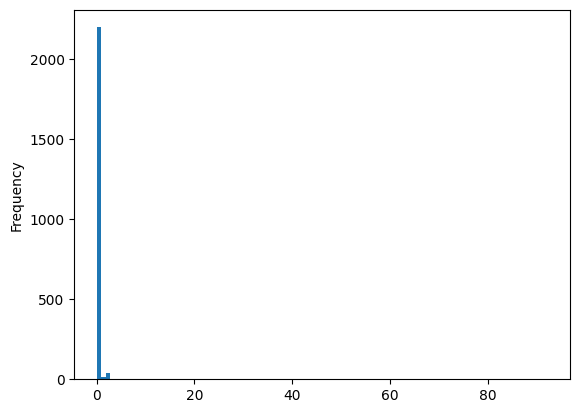

In [ ]:
merged["click_rate"].plot(kind="hist", bins = 100)

- The data is highly skewed to left (many of its values are very close to zero.)

Plot the histogram of the logarithm of the data.

<Axes: ylabel='Frequency'>

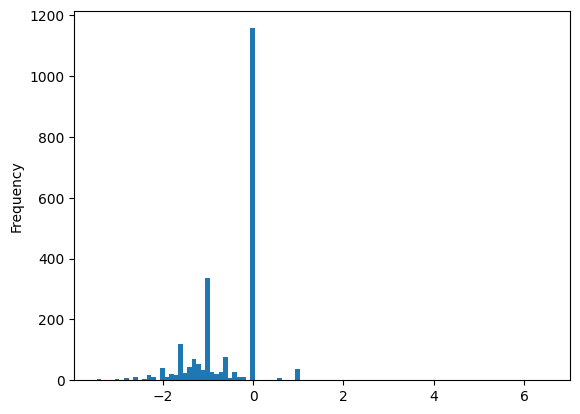

In [ ]:
merged["click_rate_log"] = np.log2(merged["click_rate"])
merged["click_rate_log"].plot(kind="hist", bins = 100)

1. An enormous spike at the 0: the actual click rate was (**There are many links that have been viewed and clicked on exactly once.**)
2. Many links that have been viewed many times but clicked on fewer (values less than zero).

<Axes: >

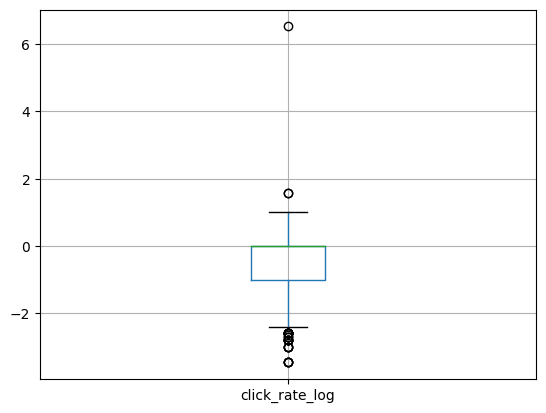

In [ ]:
merged.boxplot(column="click_rate_log")

1. Two high outliers
2. Many below the Q1 (click rate very close to zero).
> There are at least two links, that have been clicked on multiple times in the same page view.

**Question 6** <br>
Is there any correlation between clicks and previews on a link? Is it significant? How large is the effect? Make sure to at least test for potential linear as well as categorical (think binary) relationships between both variables.

In [ ]:
from scipy import stats

In [ ]:
df6 = df[df["event"].isin(["click", "preview"])]
df6.describe()

,event,date,country,city,artist,album,track,isrc,linkid
count,84263,84263,84261,84261,84252,84262,84262,82036,84263
unique,2,7,206,8137,1549,2003,2155,628,2286
top,click,2021-08-19,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
freq,55732,12995,18461,8893,15666,15666,15666,15666,15666


In [ ]:
clicks = df[df['event'] == 'click'].groupby('linkid').size().reset_index(name='clicks')
previews = df[df['event'] == 'preview'].groupby('linkid').size().reset_index(name='previews')

In [ ]:
df6 = pd.merge(left=df6, right=clicks, how="left", on="linkid")
df6 = pd.merge(left=df6, right=previews, how="left", on="linkid")
df6.dropna(subset=["clicks", "previews"], inplace=True)

In [ ]:
df6

,event,date,country,city,artist,album,track,isrc,linkid,clicks,previews
0,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8,9692.0,5974.0
1,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8,9692.0,5974.0
2,click,2021-08-21,India,Ludhiana,Reyanna Maria,So Pretty,So Pretty,USUM72100871,23199824-9cf5-4b98-942a-34965c3b0cc2,1187.0,718.0
3,click,2021-08-21,France,Unknown,"Simone & Simaria, Sebastian Yatra",No Llores Más,No Llores Más,BRUM72003904,35573248-4e49-47c7-af80-08a960fa74cd,69.0,30.0
4,click,2021-08-21,Maldives,Malé,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8,9692.0,5974.0
...,...,...,...,...,...,...,...,...,...,...,...
84258,preview,2021-08-23,United States,Brentwood,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8,9692.0,5974.0
84259,preview,2021-08-23,Saudi Arabia,Riyadh,Evanescence,Fallen,Bring Me To Life,USWU30200093,0ea9f8bf-a144-42bd-a7b0-124e73914da4,20.0,14.0
84260,preview,2021-08-23,Ukraine,Kyiv,Miscél,when you left,when you left,QM42K1907890,2fc15e8b-83aa-40ee-9f9d-5d96c6d4356c,235.0,145.0
84261,preview,2021-08-23,Saudi Arabia,Khamis Mushait,Anne-Marie,Beautiful,Beautiful,GBAHS2100225,522da5cc-8177-4140-97a7-a84fdb4caf1c,2109.0,1605.0


Calculate the correlation coefficient

**Pandas**

In [ ]:
df6.corr()

<ipython-input-122-95aed556a08b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df6.corr()


,clicks,previews
clicks,1.000000,0.998713
previews,0.998713,1.000000


**SciPy**

In [ ]:
stats.pearsonr(x=df6["clicks"], y=df6["previews"])

PearsonRResult(statistic=0.9987125072008585, pvalue=0.0)

- Perfectly positive correlation between the number of clicks and previews which seems logical.

` pd.factorize()`: a utility used to encode a categorical variable as an enumerated type, or more simply, **to convert a categorical variable into numeric codes**

In [ ]:
categories = ["country", "city", "artist", "album", "track"]
factorized_df = df6[categories] \
                     .apply(lambda x: pd.factorize(x)[0]) \
                     .corr()
factorized_df

,country,city,artist,album,track
country,1.000000,0.189353,0.018565,0.023316,0.024796
city,0.189353,1.000000,0.103752,0.108283,0.111936
artist,0.018565,0.103752,1.000000,0.946371,0.949177
album,0.023316,0.108283,0.946371,1.000000,0.976958
track,0.024796,0.111936,0.949177,0.976958,1.000000
